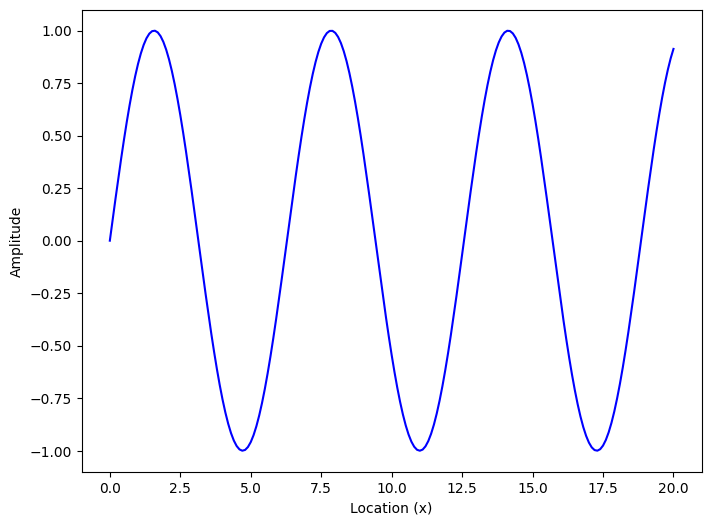

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('seaborn-poster')
# %matplotlib inline

# Generate x values from 0 to 20, with 201 evenly spaced points
x = np.linspace(0, 20, 201)
# Calculate y as the sine of x
y = np.sin(x)

# Create a figure with width 8 inches and height 6 inches
plt.figure(figsize = (8, 6))
# Plot the sine wave in blue ('b')
plt.plot(x, y, 'b')
# Label the y-axis
plt.ylabel('Amplitude')
# Label the x-axis
plt.xlabel('Location (x)')
# Show the figure
plt.show()

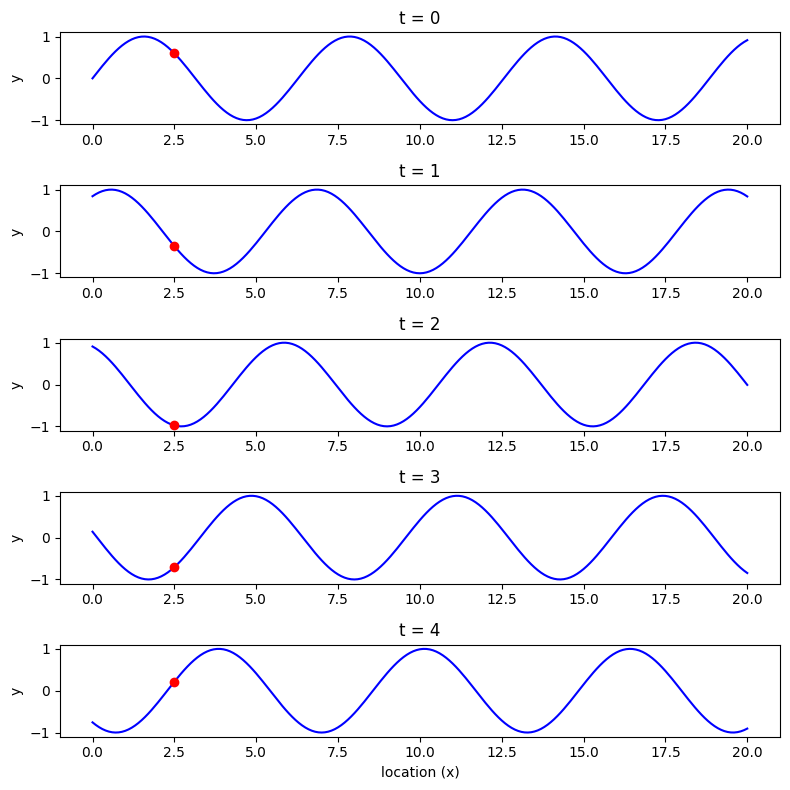

In [3]:
# Create a square figure (8x8 inches)
fig = plt.figure(figsize = (8,8))

# Create an array [0, 1, 2, 3, 4] representing time shifts
times = np.arange(5)

# Number of time steps
n = len(times)

# Loop through each time value
for t in times:
    # Create subplot (n rows, 1 column, position t+1)
    plt.subplot(n, 1, t+1)
    # Generate sine wave shifted by t
    y = np.sin(x + t)
    # Plot sine wave in blue
    plt.plot(x, y, 'b')
    # Highlight one specific point on the curve: x[25] and its corresponding y value
    plt.plot(x[25], y [25], 'ro')
    # Set y-axis limits to keep all plots comparable
    plt.ylim(-1.1, 1.1)
    # Label y-axis
    plt.ylabel('y')
    # Add title showing the current time shift
    plt.title(f't = {t}')

# Label x-axis for the bottom plot
plt.xlabel('location (x)')
# Adjust spacing between subplots so labels/titles don't overlap
plt.tight_layout()
# Show all subplots
plt.show()

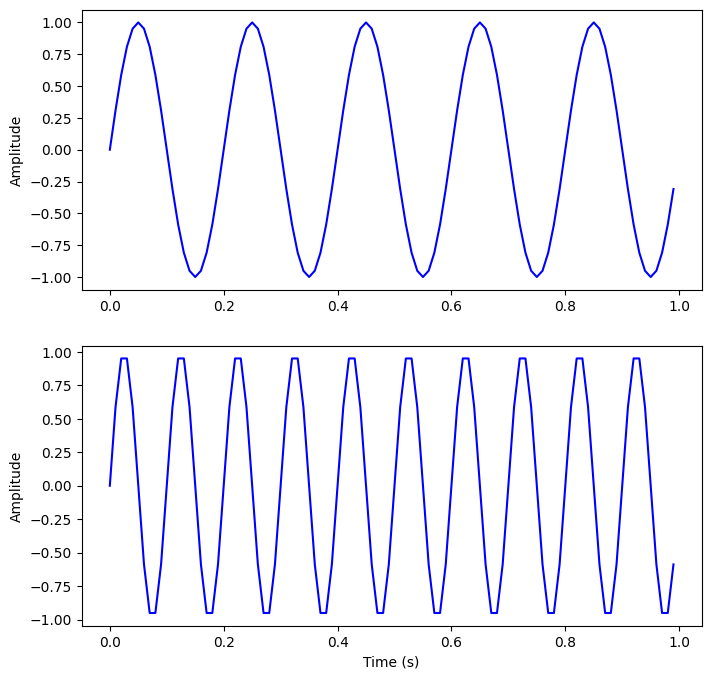

In [4]:
# Sampling rate in Hz (samples per second)
sr = 100.0
# Sampling interval (time between samples) = 1 / sampling rate
ts = 1.0/sr
# Generate time values from 0 to 1 second (exclusive) with step size ts
t = np.arange(0,1,ts)

# Frequency of first signal in Hz
freq = 5
# Sine wave equation: sin(2π × frequency × time)
y = np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 8))
plt.subplot(211)    # 2 rows, 1 column, first plot
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

freq = 10   
y = np.sin(2*np.pi*freq*t)

plt.subplot(212)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

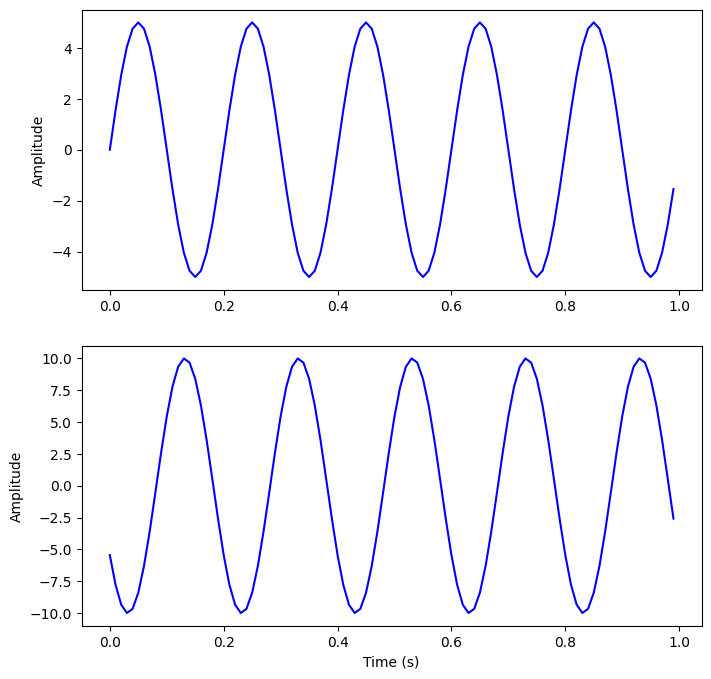

In [5]:
# Sampling rate in Hz (samples per second)
sr = 100.0
# Sampling interval (time between samples) = 1 / sampling rate
ts = 1.0/sr
# Generate time values from 0 to 1 second (exclusive) with step size ts
t = np.arange(0,1,ts)

# frequency of the signal
freq = 5   # Frequency in Hz (5 cycles per second)
y = 5*np.sin(2*np.pi*freq*t + 0)

plt.figure(figsize = (8, 8))
plt.subplot(211)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')
 
y = 10*np.sin(2*np.pi*freq*t + 10)  # Added phase shift by 10 horizontally

plt.subplot(212)
plt.plot(t, y, 'b')
plt.ylabel('Amplitude')

plt.xlabel('Time (s)')
plt.show()

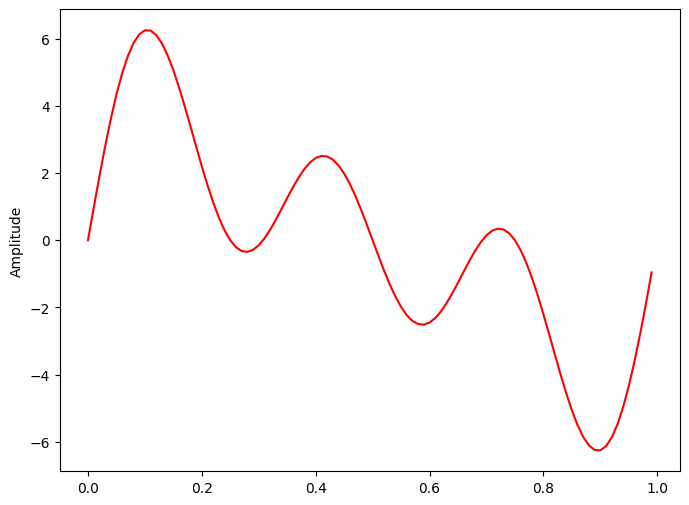

In [46]:
# # sampling rate
# sr = 100
# # sampling interval
# ts = 1.0/sr
# t = np.arange(0,1,ts)

# freq = 1.
# x = 3*np.sin(2*np.pi*freq*t)

# freq = 4
# x += np.sin(2*np.pi*freq*t)

# freq = 7   
# x += 0.5* np.sin(2*np.pi*freq*t)

# plt.figure(figsize = (8, 6))
# plt.plot(t, x, 'r')
# plt.ylabel('Amplitude')

# plt.show()


# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 0.
x = 10*np.sin(2*np.pi*freq*t)

freq = 1
x += 2.82843*np.sin(2*np.pi*freq*t)

freq = 2
x += 2* np.sin(2*np.pi*freq*t)

freq = 3
x += 2.82843* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [47]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

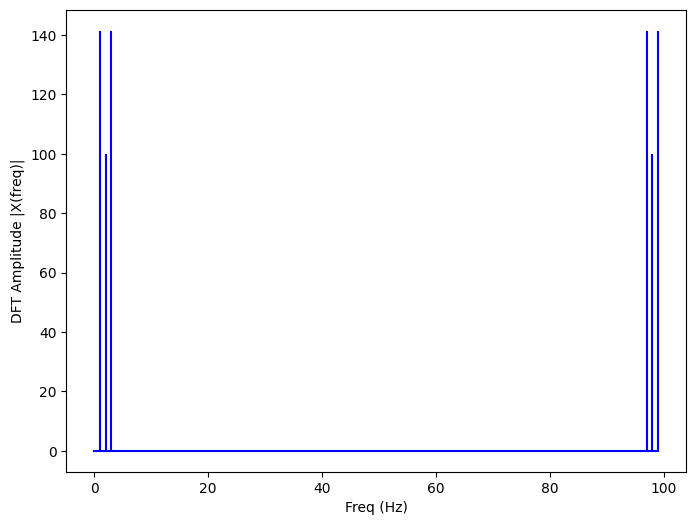

In [48]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

In [49]:
abs(X[0]).astype(int)

np.int64(0)

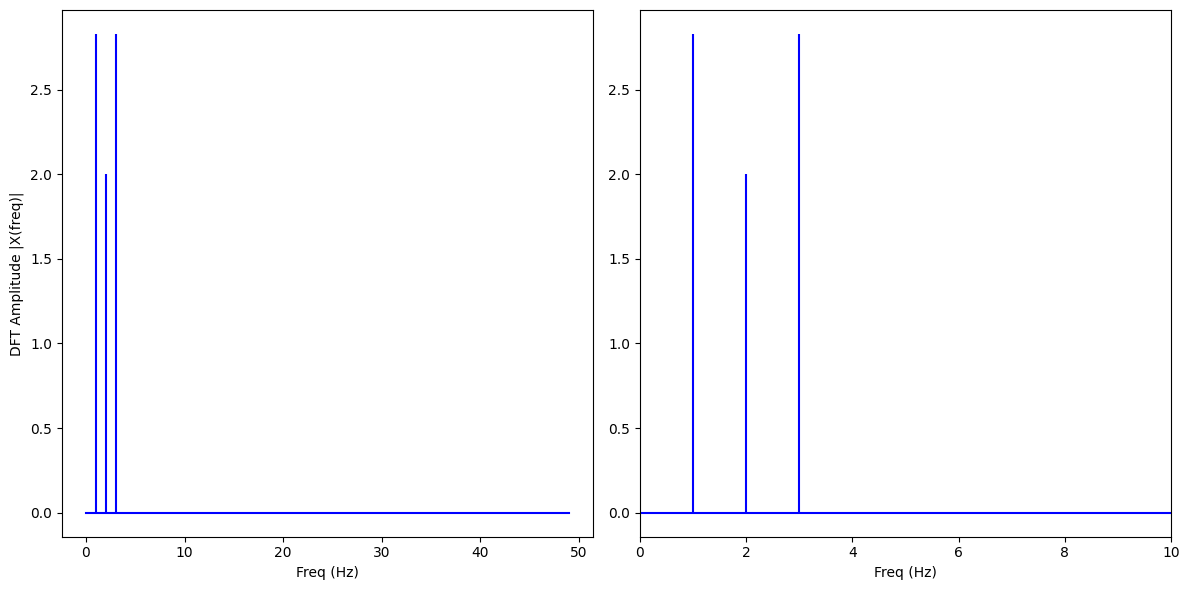

In [50]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

In [51]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [52]:
# sampling rate =2000
sr = 2000
%timeit DFT(gen_sig(sr))

115 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# sampling rate 20000
sr = 20000
%timeit DFT(gen_sig(sr))